In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('data/SeoulBikeData.csv', encoding='unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df = df.drop(['Date'], axis=1)      # 날짜 컬럼 제거
df.fillna(0, inplace=True)          # 결측치 0으로 대체

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer

In [9]:
le = LabelEncoder()
for i in df:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i].astype(str))
    else:
        continue

In [10]:
x = df.drop(['Rented Bike Count'], axis=1)  # 렌트된 자전거 수를 제외한 모든 컬럼
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [11]:
y = df['Rented Bike Count'].values  # 렌트된 자전거 수 컬럼

In [12]:
import numpy as np

In [13]:
df.fillna(0)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [16]:
regr = RandomForestRegressor()
regr.fit(x_train, y_train)

RandomForestRegressor()

In [17]:
from sklearn.metrics import r2_score

In [18]:
y_pred = regr.predict(x_test)

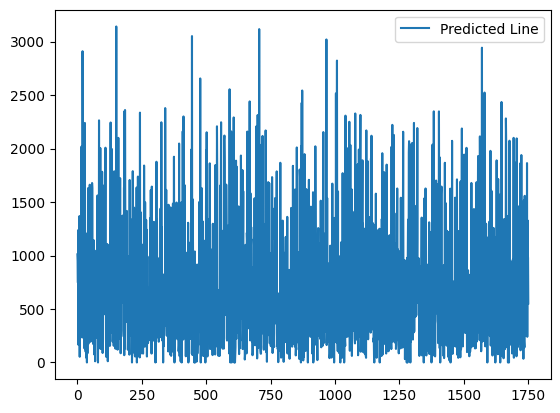

In [19]:
plt.plot(y_pred)
plt.legend(['Predicted Line'])
plt.show()

In [20]:
r2_score(y_test, y_pred)

0.8682402187977416

In [23]:
import pickle
pickle.dump(regr, open('model/seoul_bike_model.pkl', 'wb')) # 모델 저장

In [24]:
df.to_csv('data/new_bike.csv', index=False)     # 전처리된 데이터 저장